In [1]:
import sys
import pandas as pd
import sqlite3
sys.path.append("..")
from source import dbread as db
from source import utils
from source import drawing
utils.set_default_path()
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### Read the data from ./db/future_kbars.
if there is not db file, please ask me by email to get the link

In [2]:
print(f"First day of the database is: {db.get_first_day()}")
print(f"Latest day of the database is: {db.get_latest_day()}")

First day of the database is: 2021-01-04
Latest day of the database is: 2024-10-30


### In the range of data, you can get any date of future data 

In [3]:
df = db.get_daily_data("2024-10-25")

print(f"The type of output is: {type(df)}")
print(f"The shape of the output is: {df.shape}")
print(df.head(10))

The type of output is: <class 'pandas.core.frame.DataFrame'>
The shape of the output is: (1138, 8)
                    ts        date     Open     High      Low    Close  Volume      Amount
0  2024-10-25 08:46:00  2024-10-25  23270.0  23306.0  23261.0  23305.0     724  16857488.0
1  2024-10-25 08:47:00  2024-10-25  23305.0  23305.0  23253.0  23277.0     760  17696457.0
2  2024-10-25 08:48:00  2024-10-25  23277.0  23277.0  23256.0  23258.0     519  12074280.0
3  2024-10-25 08:49:00  2024-10-25  23262.0  23264.0  23252.0  23252.0     222   5162958.0
4  2024-10-25 08:50:00  2024-10-25  23253.0  23268.0  23253.0  23263.0      77   1791148.0
5  2024-10-25 08:51:00  2024-10-25  23262.0  23263.0  23256.0  23262.0      84   1953753.0
6  2024-10-25 08:52:00  2024-10-25  23263.0  23267.0  23260.0  23267.0      70   1628432.0
7  2024-10-25 08:53:00  2024-10-25  23268.0  23275.0  23264.0  23269.0     119   2769102.0
8  2024-10-25 08:54:00  2024-10-25  23271.0  23273.0  23258.0  23259.0     112   2

#### The explain of dataframe
- ts : 一分K(每分鐘統計一次)
- data : 每日的期貨資料是從 早上08:45~13:45，晚上15:00~隔日05:00
         舉例來說 10-25 會有 10-26 00:00 ~ 05:00 的資料
- Open : 本分鐘第一筆交易的值
- High : 本分鐘的最高值 
- Low : 本分鐘的最低值
- Close : 本分鐘最後一筆交易的值
- Volume : 本分鐘的交易量 
- Amount : 本分鐘的交易金額 

#### 五筆一分K可以組合成一筆五分K 
常見的分K 
- 5分K
- 10分K
- 30分K
- 60分K

In [4]:
# 需要跨日的資料則需要range
df = db.get_daily_data_range("2024-10-22", "2024-10-25")
print(f"The shape of the output is: {df.shape}")
print(df.head(10))   

The shape of the output is: (4548, 8)
                    ts        date     Open     High      Low    Close  Volume      Amount
0  2024-10-22 08:46:00  2024-10-22  23560.0  23563.0  23512.0  23535.0    1650  38836945.0
1  2024-10-22 08:47:00  2024-10-22  23535.0  23535.0  23517.0  23524.0     451  10609509.0
2  2024-10-22 08:48:00  2024-10-22  23524.0  23552.0  23524.0  23543.0     374   8804479.0
3  2024-10-22 08:49:00  2024-10-22  23543.0  23550.0  23531.0  23532.0     207   4872709.0
4  2024-10-22 08:50:00  2024-10-22  23532.0  23555.0  23530.0  23552.0     298   7017058.0
5  2024-10-22 08:51:00  2024-10-22  23550.0  23555.0  23540.0  23540.0     234   5509745.0
6  2024-10-22 08:52:00  2024-10-22  23539.0  23550.0  23534.0  23546.0     201   4732093.0
7  2024-10-22 08:53:00  2024-10-22  23546.0  23547.0  23530.0  23537.0     154   3624932.0
8  2024-10-22 08:54:00  2024-10-22  23536.0  23539.0  23518.0  23520.0     361   8492877.0
9  2024-10-22 08:55:00  2024-10-22  23519.0  23526.0

In [5]:
# 因為有些日期是假日，所以如果用傳統的方式統計N天會有問題，不足N天的問題
db.get_previous_n_data_range("2024-10-25", 10) # 總共1+10 = 11天
print(f"The shape of the output is: {df.shape}")
print(df.head(10))

The shape of the output is: (4548, 8)
                    ts        date     Open     High      Low    Close  Volume      Amount
0  2024-10-22 08:46:00  2024-10-22  23560.0  23563.0  23512.0  23535.0    1650  38836945.0
1  2024-10-22 08:47:00  2024-10-22  23535.0  23535.0  23517.0  23524.0     451  10609509.0
2  2024-10-22 08:48:00  2024-10-22  23524.0  23552.0  23524.0  23543.0     374   8804479.0
3  2024-10-22 08:49:00  2024-10-22  23543.0  23550.0  23531.0  23532.0     207   4872709.0
4  2024-10-22 08:50:00  2024-10-22  23532.0  23555.0  23530.0  23552.0     298   7017058.0
5  2024-10-22 08:51:00  2024-10-22  23550.0  23555.0  23540.0  23540.0     234   5509745.0
6  2024-10-22 08:52:00  2024-10-22  23539.0  23550.0  23534.0  23546.0     201   4732093.0
7  2024-10-22 08:53:00  2024-10-22  23546.0  23547.0  23530.0  23537.0     154   3624932.0
8  2024-10-22 08:54:00  2024-10-22  23536.0  23539.0  23518.0  23520.0     361   8492877.0
9  2024-10-22 08:55:00  2024-10-22  23519.0  23526.0

In [6]:
daily_df = db.get_daily_kbars_with_n_data_range("2024-10-25", 25)
print(daily_df)

          date     Open     High      Low    Close  Volume        Amount
0   2024-09-18  21730.0  21950.0  21560.0  21651.0  120450  2.618943e+09
1   2024-09-19  21763.0  22434.0  21661.0  22353.0  145595  3.209105e+09
2   2024-09-20  22345.0  22425.0  22097.0  22194.0  120377  2.678926e+09
3   2024-09-23  22291.0  22392.0  22194.0  22318.0   99366  2.217137e+09
4   2024-09-24  22298.0  22903.0  22152.0  22825.0  149093  3.354889e+09
..         ...      ...      ...      ...      ...     ...           ...
19  2024-10-21  23810.0  23836.0  23431.0  23660.0  109173  2.579518e+09
20  2024-10-22  23560.0  23667.0  23332.0  23561.0  116742  2.746254e+09
21  2024-10-23  23498.0  23511.0  23133.0  23300.0  133321  3.115748e+09
22  2024-10-24  23383.0  23449.0  23203.0  23287.0  118042  2.753638e+09
23  2024-10-25  23270.0  23709.0  23252.0  23551.0  108906  2.556610e+09

[24 rows x 7 columns]


### 以天為單位，畫出Daily Kbars
使用dkbar : d 表示 daily

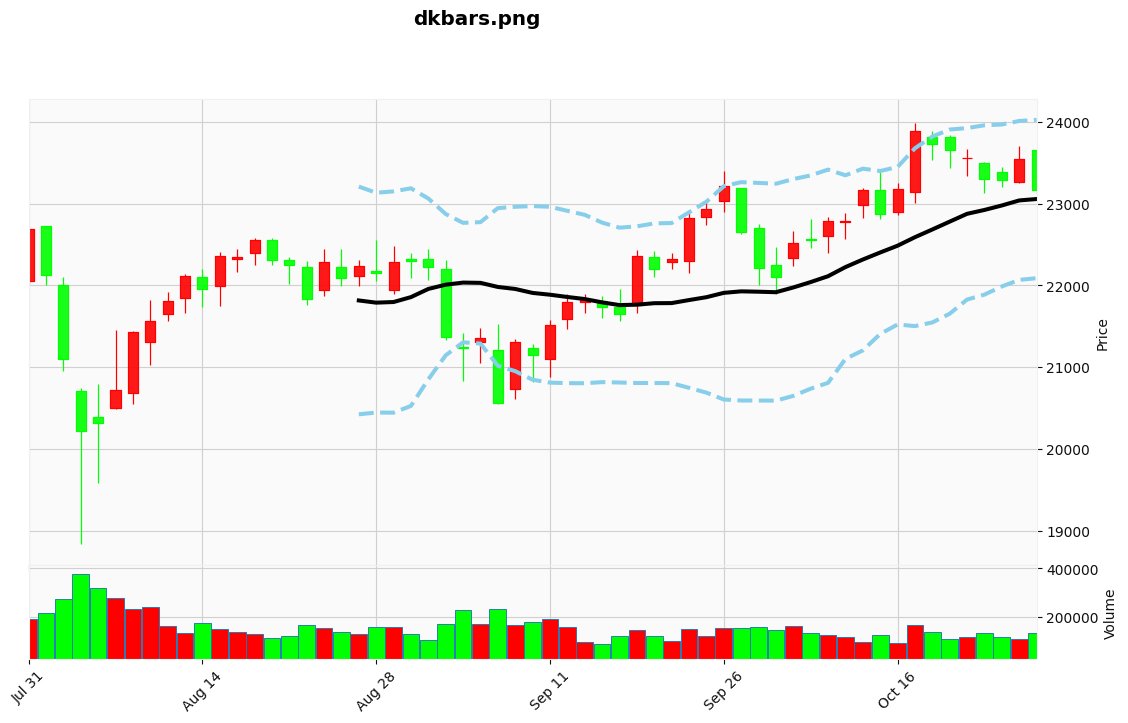

In [7]:
daily_df = db.get_daily_kbars_with_n_data_range("2024-10-28", 60) # 過去60天
drawing.dkbar(daily_df, show=True) # show = False 則存圖於./imgs/

### 以分鐘為單位，畫出Minute Kbars
使用kbar : 

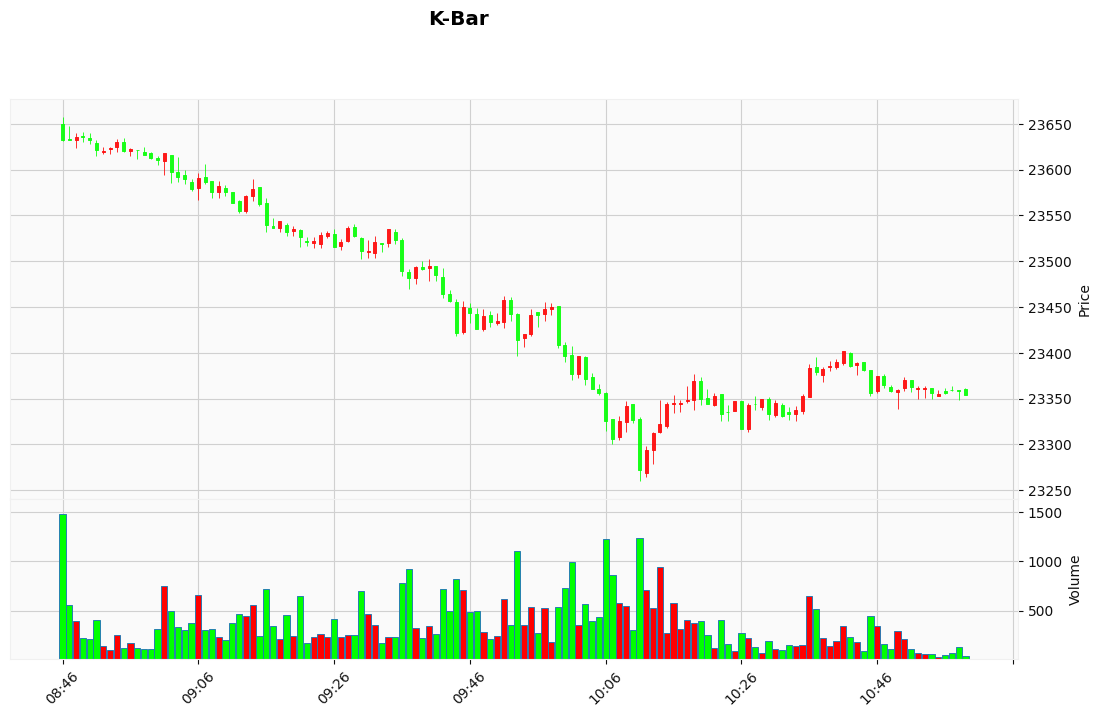

In [8]:

mdf = db.get_daily_data("2024-10-28")
# set range 避免輸入太多資料
mdf = drawing.ts_slice(mdf, "08:45", "11:00")
# 畫出08:45~11:00的分K
drawing.kbar(mdf)


### 以分鐘為單位，畫出Minute Kbars
使用mkbar : 以分鐘為單位並加上技術指標 

start_time: 2024-10-28 08:46:00, end_time: 2024-10-28 10:59:00


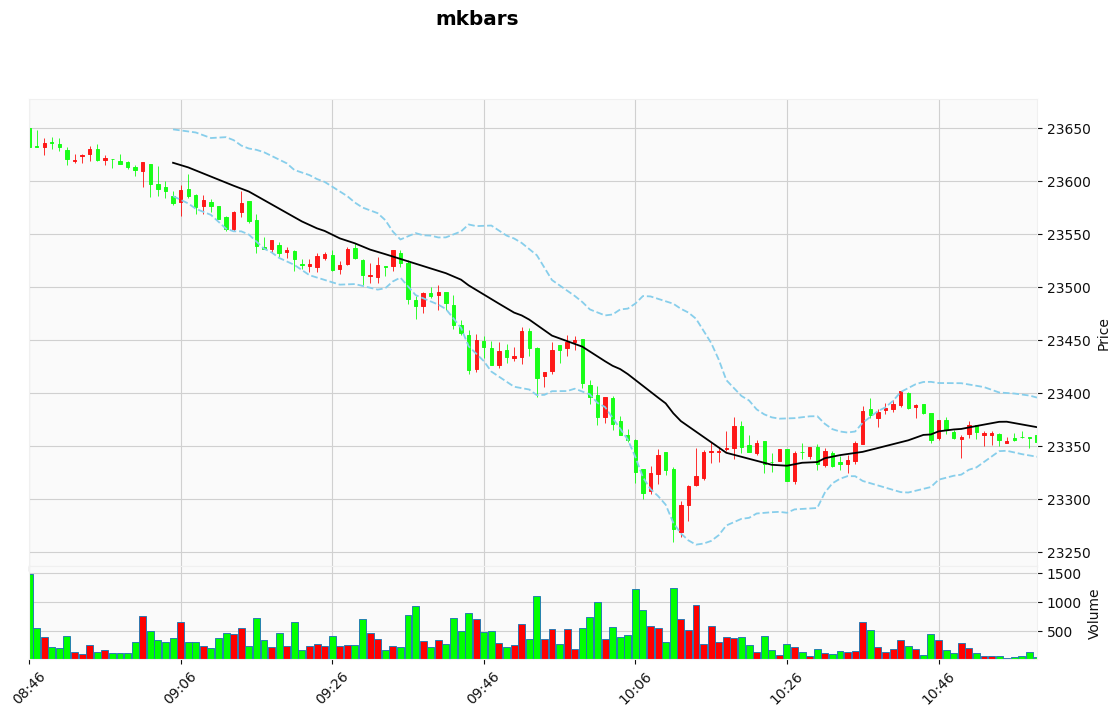

In [9]:
drawing.mkbar(mdf, show=True) # show = False 則存圖於./imgs/

### 一分K資料太多了，我們轉成N分K的資料


start_time: 2024-10-28 08:50:00, end_time: 2024-10-28 13:40:00


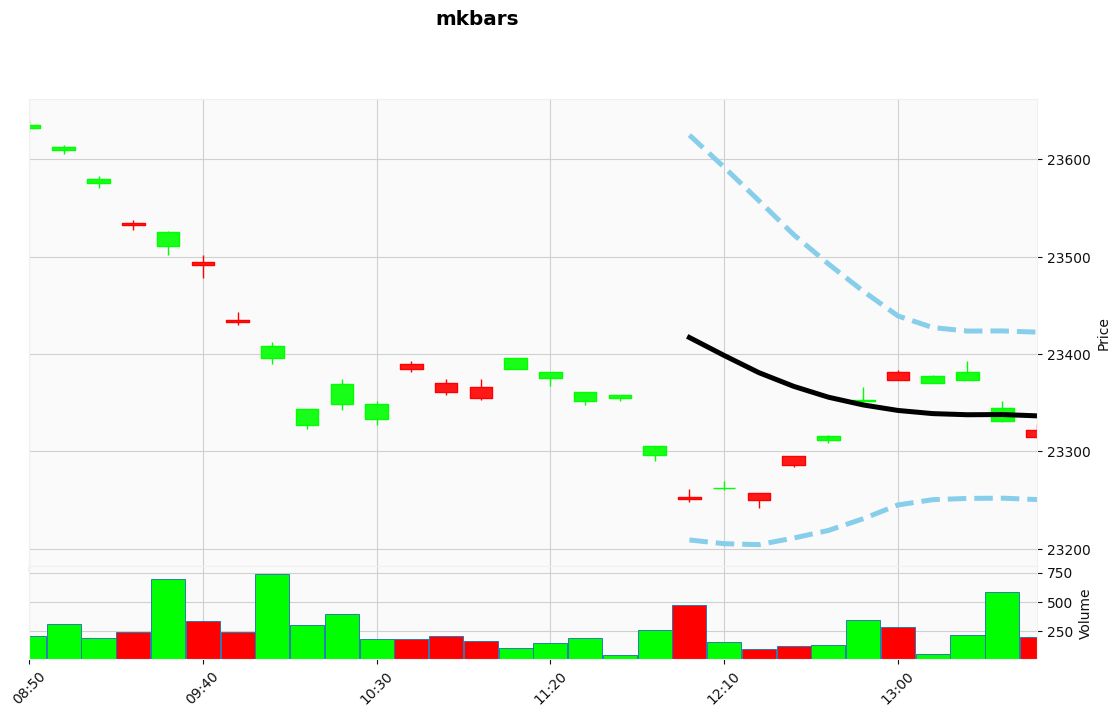

In [18]:
ndf = db.get_daily_data("2024-10-28")
ndf = drawing.ts_slice(ndf, "08:45", "14:00")
ndf = drawing.change_to_n_kbars(ndf, 10) # 10分K
drawing.mkbar(ndf, show=True) # show = False 則存圖於./imgs/